# Features Affecting Frequency and Duration of Ford Go Bike Trips

## by Stephanie Irvine

## Investigation Overview

In this investigation, I investigated which features are best for predicting the duration and frequency of bike trips. The main focus was time of day and day of the week as well as user type, that is whether the rider is a subscriber or customer, and member age. Gender was also investigated to understand if this effects the frequency and duration of bike rides.

## Dataset Overview

The Ford Go Bike data is from the year 2018 and, after cleaning, consisted of 1,725,137 rows with 15 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). The variables are a mixture of datetimes, integers, floats, strings and categories. The categories for user_type are “Subscriber” = Member or “Customer” = Casual. The categories for gender are Female, Male or Other. A bike_share_for_all_trip variable indicates whether the rider is part of the Bike Share For All program available for those on a low income. Additional features were created including; age, month, start_hour, day of week, distance, and duration in minutes. The data was cleaned by removing null values, changing data types and also removing outliers in the member_birth_year column, therefore the data consists of cyclists from the ages of 18-65. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset saved from exploratory analysis into a pandas dataframe
df = pd.read_csv("2018-fordgobike-data-clean.csv")

In [3]:
#check it worked
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_hour,day,month,age,distance
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Subscriber,1986,Male,No,1254.733333,22,Wednesday,January,32,2.490689
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Customer,1996,Male,No,1192.933333,14,Wednesday,January,22,2.972635
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Subscriber,1991,Male,No,666.100000,19,Wednesday,January,27,2.439039
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,Subscriber,1988,Male,No,7.550000,23,Wednesday,January,30,1.341075
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980,Male,No,3.000000,23,Wednesday,January,38,0.632321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725132,1137,2018-12-01 00:01:49.693,2018-12-01 00:20:47.519,73.0,Pierce St at Haight St,37.771793,-122.433708,50.0,2nd St at Townsend St,37.780526,...,Subscriber,1990,Male,No,18.950000,0,Saturday,December,28,3.935288
1725133,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,...,Subscriber,1982,Female,No,7.883333,0,Saturday,December,36,1.138059
1725134,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,...,Subscriber,1999,Female,No,14.016667,0,Saturday,December,19,2.362164
1725135,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,...,Subscriber,1991,Male,No,4.333333,0,Saturday,December,27,0.721480


## Distribution of Trip Duration

The bike trip duration distribution highlights that the majority of bike trips last under 30 minutes. Plotted on a logarithmic scale, the distribution of bike trip duration takes on a normal distribution.

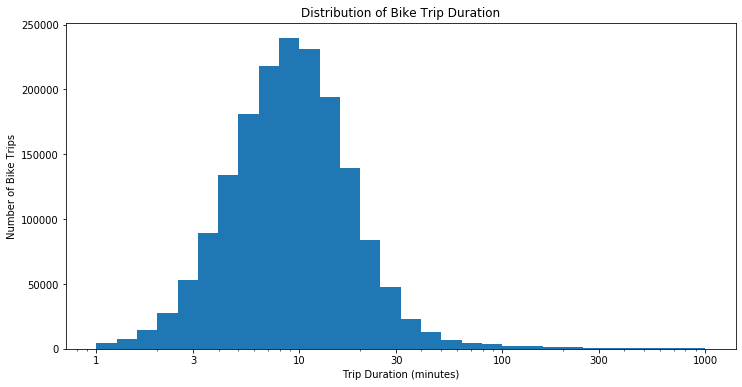

In [4]:
plt.figure(figsize=[12,6])
bin_edges = 10 ** np.arange(0, 3 + 0.1, 0.1)
ticks = [1, 3, 10, 30, 100, 300, 1000]
plt.hist(data = df, x = 'duration_min', bins=bin_edges)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.title('Distribution of Bike Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Bike Trips');

## Frequency of Bike Trips by Hour of the Day

It is clear from the plot that more bike trips are taken during commuting hours of 7am - 9am and then 4pm-7pm. The day was investigated next to tell if this is happening on weekdays when people will use the bikes to travel to work.

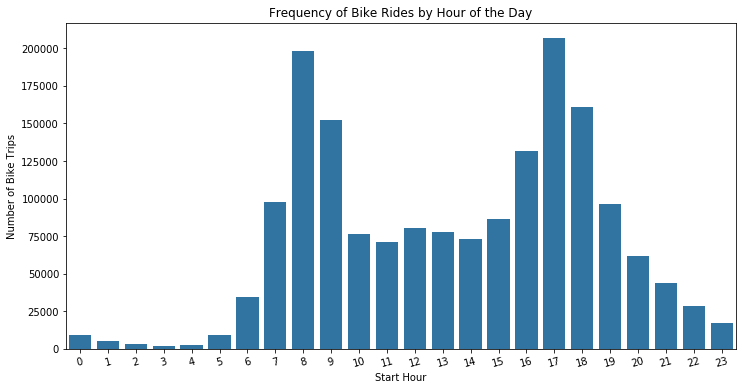

In [5]:
# plot the frequency of bike rides by hour of the day
plt.figure(figsize=[12,6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_hour', color = base_color)
plt.xlabel('Start Hour')
plt.ylabel('Number of Bike Trips')
plt.title('Frequency of Bike Rides by Hour of the Day')
plt.xticks(rotation=15);

## Frequency of Bike Trips by Day of the Week

It is clear that more bike trips take place on weekdays compared to weekends. This is expected as people can use the bikes to commute to work.

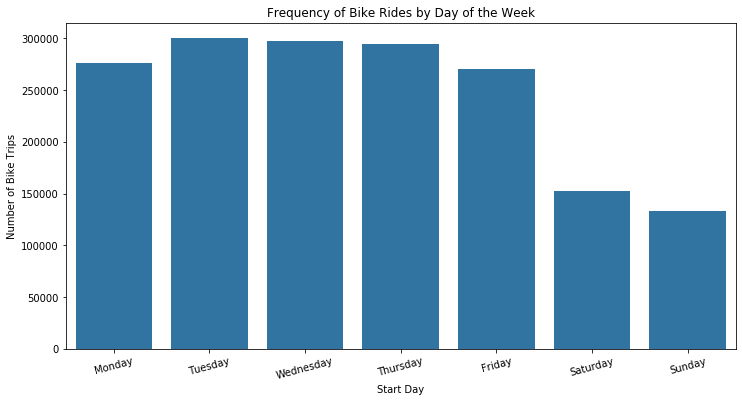

In [6]:
df['day'] = pd.Categorical(df['day'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
plt.figure(figsize=[12,6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'day', color = base_color)
plt.xlabel('Start Day')
plt.ylabel('Number of Bike Trips')
plt.title('Frequency of Bike Rides by Day of the Week')
plt.xticks(rotation=15);

## Frequency of Bike Trips by Month

It is evident from the graph that more bike trips were taking in the months from May - October. This is over the end of Spring - Autumn seasons.

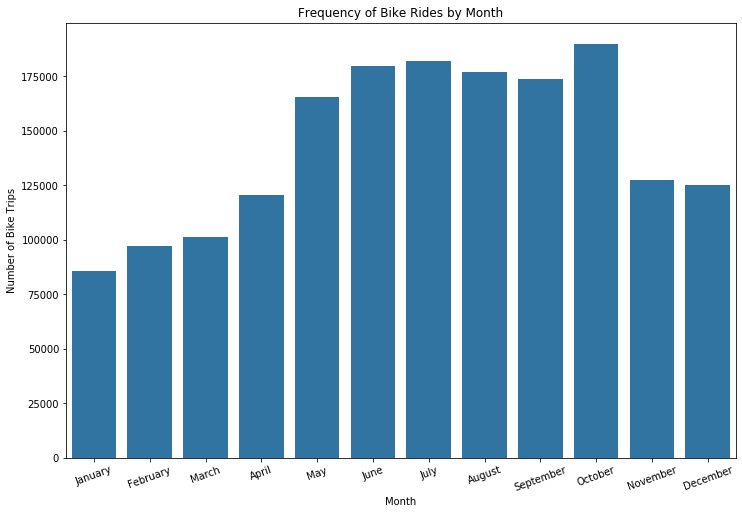

In [7]:
#plot the frequency of bike rides by month
plt.figure(figsize=[12,8])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'month', color = base_color)
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips')
plt.title('Frequency of Bike Rides by Month')
plt.xticks(rotation=20);

## Distribution of Cyclist Age

It is clear that a large proportion of cyclists are in their late twenties to mid thirties.

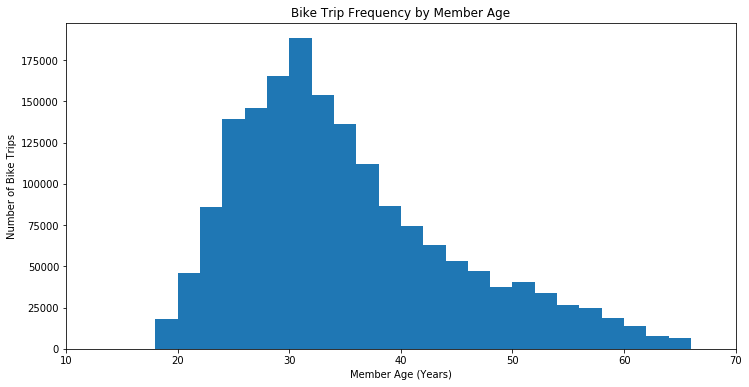

In [8]:
plt.figure(figsize=[12,6])
bin_edges = np.arange (10, df['age'].max()+2, 2)
plt.hist(data = df, x = 'age', bins = bin_edges)
plt.xlim(10, 70)
plt.xlabel('Member Age (Years)')
plt.ylabel('Number of Bike Trips')
plt.title('Bike Trip Frequency by Member Age');

## Bike Trip Frequency by Gender and User Type

Those identifying as male were more likely to take a bike trip regardless of whether they were subsribers or customers. Additionally it is clear that bike trips are more likely to be made by subcribers than by customers.

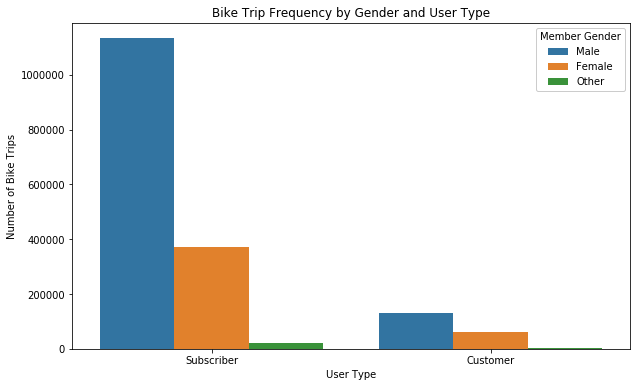

In [9]:
plt.figure(figsize=[10,6])
ax = sb.countplot(data = df, x = 'user_type', hue = 'member_gender')
ax.legend(loc = 1, framealpha = 1, title = 'Member Gender')
plt.ylabel('Number of Bike Trips')
plt.xlabel('User Type')
plt.title("Bike Trip Frequency by Gender and User Type");

## Bike Trip Duration by Gender and User Type
Although males were more likely to take a bike trip, those idenitifying as female or other were more likely to take longer bike trips regardless of whether they were a subscriber or customer. Interestingly, customers took longer bike trips than subscribers although subscribers took more shorter, more frequent trips.

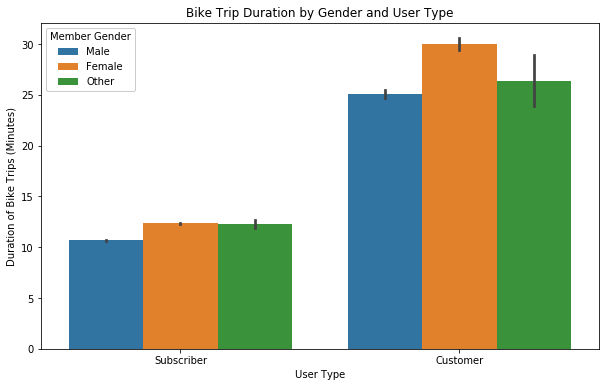

In [10]:
plt.figure(figsize = [10, 6])
ax = sb.barplot(data = df, x = 'user_type', y = 'duration_min', hue = 'member_gender')
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Member Gender')
plt.ylabel('Duration of Bike Trips (Minutes)')
plt.xlabel('User Type')
plt.title("Bike Trip Duration by Gender and User Type");

## Bike Trip Frequency by Day of the Week and Hour of Day

It is evident from the heatmap below that the most popular times for bike trips are during commuting hours which are from 7am - 9am and 4pm - 7pm. 

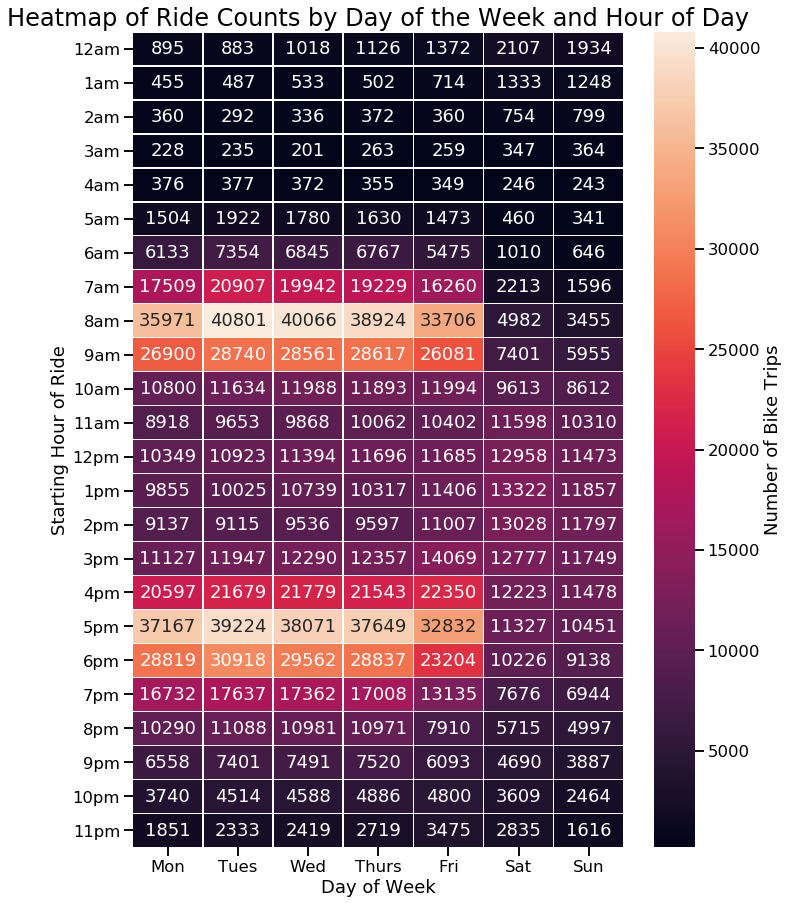

In [11]:
df2 = pd.pivot_table(df[['day', 'start_hour', 'duration_min']], index=['day', 'start_hour'], aggfunc='count')
df3 = df2.unstack(level=0)

am_hrs = []
for hr in range(1, 12):
    complete_hr = str(hr) + "am"
    am_hrs.append(complete_hr)
    
pm_hrs = []
for hr in range(1, 12):
    complete_hr = str(hr) + "pm"
    pm_hrs.append(complete_hr)
    
complete_hrs = ["12am"] + am_hrs + ["12pm"] + pm_hrs
day_abbr = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

sb.set_context("talk")
f, ax = plt.subplots(figsize=(11, 15))
ax = sb.heatmap(df3, annot=True, fmt="d", linewidths=.5, ax=ax, xticklabels=day_abbr, yticklabels=complete_hrs, 
                cbar_kws = {'label' : 'Number of Bike Trips'},)
ax.axes.set_title("Heatmap of Ride Counts by Day of the Week and Hour of Day", fontsize=24, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Starting Hour of Ride');

## Bike Trip Duration by Day of the Week and Hour of Day

It is evident from the heatmap below that on average the longest bike trips take place in the early hours of the morning throughout the weekdays and that longer bike trips take place at the weekends compared to weekdays. 

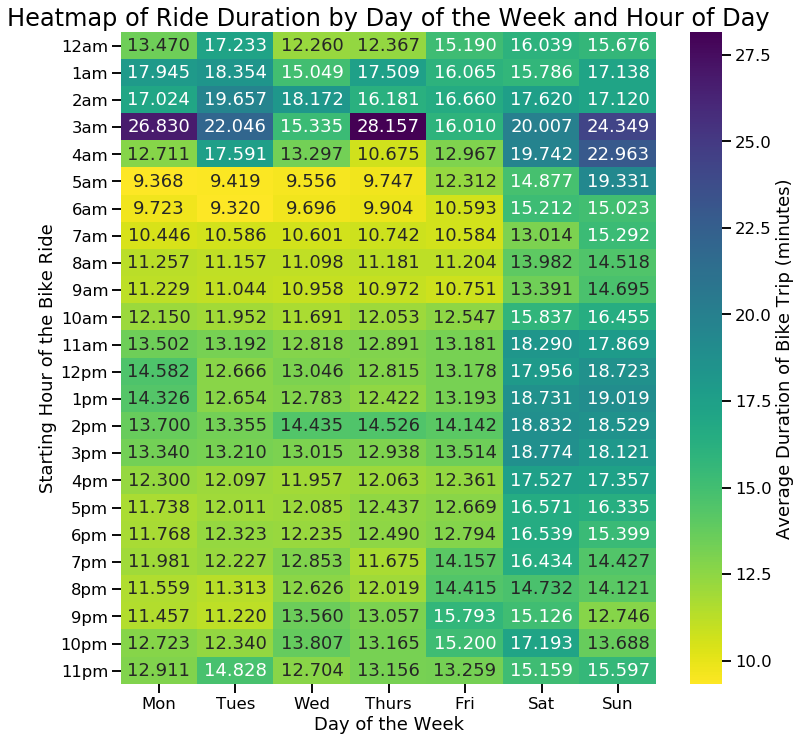

In [12]:
# heatmap for bike trip duration
plt.figure(figsize = [12, 12])
cat_means = df.groupby(['day', 'start_hour']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'start_hour', columns = 'day',
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Average Duration of Bike Trip (minutes)'}, xticklabels=day_abbr, yticklabels=complete_hrs,
          cmap="viridis_r")
plt.xlabel("Day of the Week")
plt.ylabel("Starting Hour of the Bike Ride")
plt.title("Heatmap of Ride Duration by Day of the Week and Hour of Day",  fontsize=24, y=1.01);